This notebook analyze developers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline
df = pd.read_excel("../Dataset-SBES2020.xlsx")

In [2]:
YES = "YES"
len(df[df["Conflicts"] != YES]), len(df[df["Conflicts"] == YES])

(164454, 17819)

In [3]:
YES = "YES"
no_conflict_no_intersection = df[
    (df["Conflicts"] != YES)
    & (df[" Intersection of Developers"] == "No intersection")
]
conflict_no_intersection = df[
    (df["Conflicts"] == YES)
    & (df[" Intersection of Developers"] == "No intersection")
]
no_conflict_some_intersection = df[
    (df["Conflicts"] != YES)
    & (df[" Intersection of Developers"] == "Some intersection")
]
conflict_some_intersection = df[
    (df["Conflicts"] == YES)
    & (df[" Intersection of Developers"] == "Some intersection")
]
no_conflict_all_intersection = df[
    (df["Conflicts"] != YES)
    & (df[" Intersection of Developers"] == "All dev. in common")
]
conflict_all_intersection = df[
    (df["Conflicts"] == YES)
    & (df[" Intersection of Developers"] == "All dev. in common")
]

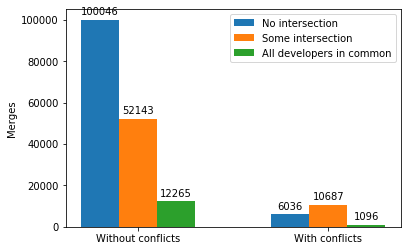

In [4]:
labels = ["Without conflicts", "With conflicts"]
no_intersection_values = [
    len(no_conflict_no_intersection),
    len(conflict_no_intersection),
]
some_intersection_values = [
    len(no_conflict_some_intersection),
    len(conflict_some_intersection),

]    
all_intersection_values = [ 
    len(no_conflict_all_intersection),
    len(conflict_all_intersection),
]
width = 0.60
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, no_intersection_values, width/3, label='No intersection')
rects2 = ax.bar(x, some_intersection_values, width/3, label='Some intersection')
rects3 = ax.bar(x + width/3, all_intersection_values, width/3, label='All developers in common')
ax.set_ylabel('Merges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(ax, rects, fmt='{}'):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(fmt.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(ax, rects1)
autolabel(ax, rects2)
autolabel(ax, rects3)
fig.savefig("output/developers.png")

In [5]:
with_conflicts =  df[
    (df["Conflicts"] == YES)
]
without_conflicts =  df[
    (df["Conflicts"] != YES)
]
def normalize(data):
    return [
        data[0] / len(without_conflicts) * 100,
        data[1] / len(with_conflicts) * 100
    ]

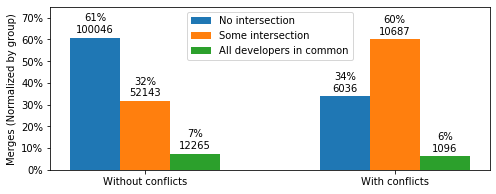

In [6]:
def autolabel2(ax, rects, denorm, fmt='{:.0f}%\n{}'):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        dheight = int(round(height * denorm[i] / 100))
        ax.annotate(fmt.format(height, dheight),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

n_no_intersection_values = normalize(no_intersection_values)
n_some_intersection_values = normalize(some_intersection_values)
n_all_intersection_values = normalize(all_intersection_values)
width = 0.60
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, n_no_intersection_values, width/3, label='No intersection')
rects2 = ax.bar(x, n_some_intersection_values, width/3, label='Some intersection')
rects3 = ax.bar(x + width/3, n_all_intersection_values, width/3, label='All developers in common')
ax.set_ylabel('Merges (Normalized by group)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='upper center')
autolabel2(ax, rects1, [len(without_conflicts), len(with_conflicts)])
autolabel2(ax, rects2, [len(without_conflicts), len(with_conflicts)])
autolabel2(ax, rects3, [len(without_conflicts), len(with_conflicts)])
ax.set_ylim(0, 75)
fig.set_size_inches(7, 2.8)
plt.tight_layout()
fig.savefig("output/developers_normalized.png")
fig.savefig("output/developers_normalized.svg")
fig.savefig("output/developers_normalized.pdf")


In [7]:
no_intersection = df[
  (df[" Intersection of Developers"] == "No intersection")
]
some_intersection = df[
  (df[" Intersection of Developers"] == "Some intersection")
]
all_intersection = df[
  (df[" Intersection of Developers"] == "All dev. in common")
]

## Association rule

{intersection=no} -> {conflict=yes}

In [8]:
sup_xcapy = len(conflict_no_intersection)/len(df)
sup_x = len(no_intersection)/len(df)
sup_y = len(with_conflicts)/len(df)
print("Support({intersection=no} -> {conflict=yes}) = ", sup_xcapy * 100)
print("Confidence({intersection=no} -> {conflict=yes}) = ", sup_xcapy/sup_x * 100)
print("Lift({intersection=no} -> {conflict=yes}) = ", sup_xcapy/(sup_x * sup_y))


Support({intersection=no} -> {conflict=yes}) =  3.311516242120336
Confidence({intersection=no} -> {conflict=yes}) =  5.68993797251183
Lift({intersection=no} -> {conflict=yes}) =  0.5820315753205281


In [9]:
sup_xcapy = len(conflict_some_intersection)/len(df)
sup_x = len(some_intersection)/len(df)
sup_y = len(with_conflicts)/len(df)
print("Support({intersection=some} -> {conflict=yes}) = ", sup_xcapy * 100)
print("Confidence({intersection=some} -> {conflict=yes}) = ", sup_xcapy/sup_x * 100)
print("Lift({intersection=some} -> {conflict=yes}) = ", sup_xcapy/(sup_x * sup_y))


Support({intersection=some} -> {conflict=yes}) =  5.8631832471073615
Confidence({intersection=some} -> {conflict=yes}) =  17.00939041858985
Lift({intersection=some} -> {conflict=yes}) =  1.7399139232098475


In [10]:
sup_xcapy = len(conflict_all_intersection)/len(df)
sup_x = len(all_intersection)/len(df)
sup_y = len(with_conflicts)/len(df)
print("Support({intersection=all} -> {conflict=yes}) = ", sup_xcapy * 100)
print("Confidence({intersection=all} -> {conflict=yes}) = ", sup_xcapy/sup_x * 100)
print("Lift({intersection=all} -> {conflict=yes}) = ", sup_xcapy/(sup_x * sup_y))


Support({intersection=all} -> {conflict=yes}) =  0.6012958584101868
Confidence({intersection=all} -> {conflict=yes}) =  8.202978818950676
Lift({intersection=all} -> {conflict=yes}) =  0.8390939773649457


Images stored in the `output` folder